## 2.1 Introduction

## 2.2 Variable Types and Terminology

Naming convention for the prediction tasks:
- **regression** when we predict quantitative outputs
- **classification** when we predict qualitative outputs

## 2.3 Two Simple Approaches to Prediction: Least Squares and Nearest Neighbors

### 2.3.1 Linear Models and Least Squares

Given a vector of inputs $X^T = (X_1, X_2, ..., X_p)$, we predict the output $Y$ via the model

$$\hat{Y} = \hat{\beta_0} + \sum_{j=1}^{p}X_j \hat{\beta_j}$$

The term $\hat{\beta_0}$ is the intercept, also known as the **bias**. Often it is convenient to include the constant variable $1$ in $X$, include $\hat{\beta_0}$ in the vector $\hat{\beta}$, and then write the linear model in vector form as an inner product

$$\hat{Y} = X^T\hat{\beta}$$

The most popular method to fit the linear model to the set of training data is the method of **least squares**. In this approach, we pick the coefficients $\beta$ to minimize the residual sum of squares

$$\operatorname{RSS}(\beta) = \sum_{i=1}^{N} (y_i - x_i^T\beta)^2$$

The solution is easiest to characterize in matrix notation. We can write

$$\operatorname{RSS}(\beta) = (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta)$$

Differentiating w.r.t. $\beta$ we get the **normal equations**

$$\mathbf{X}^T(\mathbf{y} - \mathbf{X}\beta) = 0$$

If $\mathbf{X}^T\mathbf{X}$ is nonsingular, then the unique solution is given by

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Intuitively, it seems that we do not need a very large data set to fit such a model.

After the linear model is fit on the data, there are several misclassifications on both side of the decision boundary. Consider the two possible scenarios:
- **Scenario 1**: The training data in each class was generated from bivariate Gaussian distributions with uncorrelated components and different menas.
- **Scenario 2**: The training data in each class came from a mixture of 10 low-variance Gaussian distributions, with individual means themselves distributed as Gaussian.

In the case of one Gaussian per class, we will see in Chapter 4 that a linear decision boundary is the best one can do, and that our estimate is almost optimal. In the case of mixtures of tightly clustered Gaussian, a linear decision boundary is unlikely to be optimal, and in fact is not. The optimal decision boundary is nonlinear and disjoint, and as such will be much more difficult to obtain.

### 2.3.2 Nearest-Neighbor Methods

Nearest-neighbor methods use those obervations in the training set $\mathcal{T}$ closest in input space to $x$ to form $\hat{Y}$. Specifically, the $k$-nearest neighbor fit for $\hat{Y}$ is defined as

$$\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

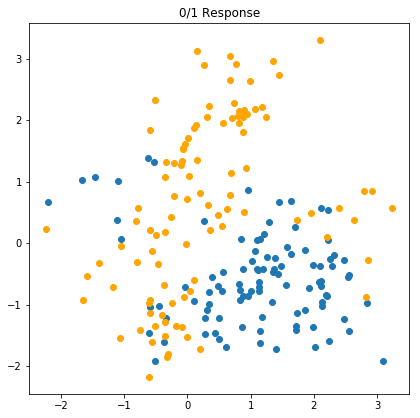

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample_size = 100

mean_blue = [1, 0]
mean_orange = [0, 1]
mean_cov = np.eye(2)
mean_size = 10

sample_cov = np.eye(2)/5

sample_blue_mean = np.random.multivariate_normal(mean_blue, mean_cov, mean_size)
sample_orange_mean = np.random.multivariate_normal(mean_orange, mean_cov, mean_size)
sample_blue = np.array([
    np.random.multivariate_normal(sample_blue_mean[random.randint(0, 9)],
                                  sample_cov)
    for _ in range(sample_size)
])
y_blue = [0 for _ in range(sample_size)]

sample_orange = np.array([
    np.random.multivariate_normal(sample_orange_mean[random.randint(0, 9)],
                                  sample_cov)
    for _ in range(sample_size)
])
y_orange = [1 for _ in range(sample_size)]

data_x = np.concatenate((sample_blue, sample_orange), axis=0)
data_y = np.concatenate((y_blue, y_orange))

sample_blue = data_x[data_y == 0, :]
sample_orange = data_x[data_y == 1, :]

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1)

ax1.plot(sample_blue[:, 0], sample_blue[:, 1], 'o')
ax1.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='orange')
ax1.set_title('0/1 Response')
plt.show()

plot_x_min, plot_x_max = ax1.get_xlim()
plot_y_min, plot_y_max = ax1.get_ylim()